In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

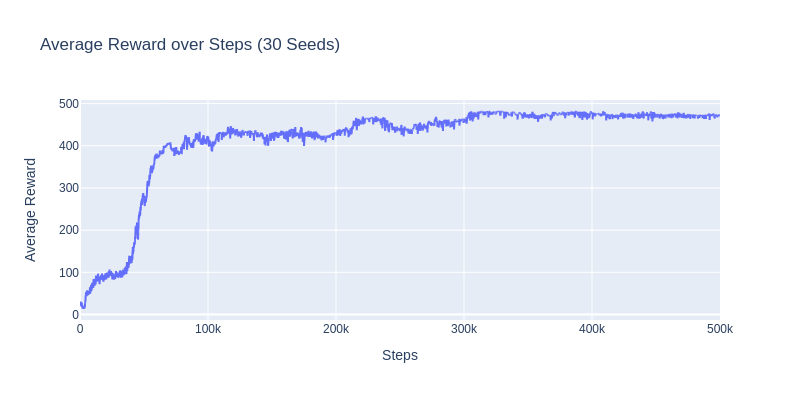

In [9]:
fig = go.Figure()

interpolated_sum = np.zeros(500_000+1)

for i in range(30):

    # Path to your CSV file
    csv_path = f"/home/pedro-mapa/Documents/UofA/Fall 2025 Courses/CMPUT 655/role_of_lambda/runs/lambda_0/run_lambda_0_seed_{i}.csv"

    # Read CSV
    df = pd.read_csv(csv_path)


    # Replace these with the correct column names from df
    x_col = df.columns[1]
    y_col = df.columns[0]

    # fig.add_trace(go.Scatter(x=df[x_col], y=df[y_col], mode='lines', name=f'Seed {i}'))
    interpolated_values = np.interp(np.linspace(0, 500_000, 500_000+1), df[x_col], df[y_col])
    interpolated_sum += interpolated_values
fig = px.line(x=np.linspace(0, 500_000, 500_000+1), y=interpolated_sum/30, labels={'x': 'Steps', 'y': 'Average Reward'}, title='Average Reward over Steps (30 Seeds)')
fig.update_layout(width=800, height=400)
fig.show(renderer='png')

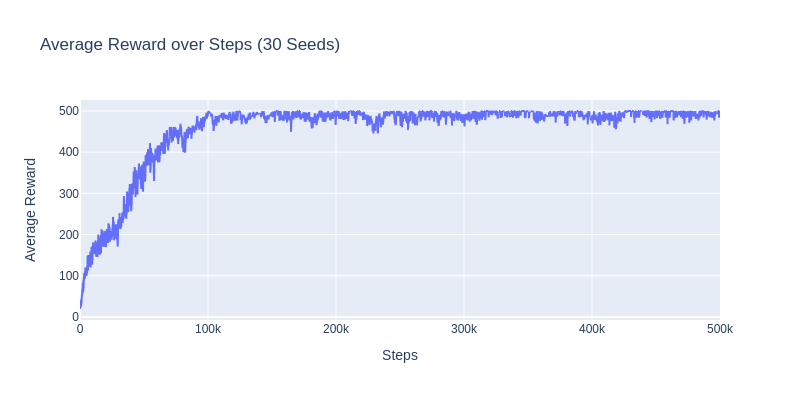

In [ ]:
fig = go.Figure()

interpolated_sum = np.zeros(500_000+1)

for i in range(30):

    # Path to your CSV file
    csv_path = f"/home/pedro-mapa/Documents/UofA/Fall 2025 Courses/CMPUT 655/role_of_lambda/runs/lambda_1/run_lambda_1_seed_{i}.csv"

    # Read CSV
    df = pd.read_csv(csv_path)


    # Replace these with the correct column names from df
    x_col = df.columns[1]
    y_col = df.columns[0]

    # fig.add_trace(go.Scatter(x=df[x_col], y=df[y_col], mode='lines', name=f'Seed {i}'))
    interpolated_values = np.interp(np.linspace(0, 500_000, 500_000+1), df[x_col], df[y_col])
    interpolated_sum += interpolated_values
fig = px.line(x=np.linspace(0, 500_000, 500_000+1), y=interpolated_sum/30, labels={'x': 'Steps', 'y': 'Average Reward'}, title='Average Reward over Steps (30 Seeds)')
fig.update_layout(width=800, height=400)
fig.show(renderer='png')

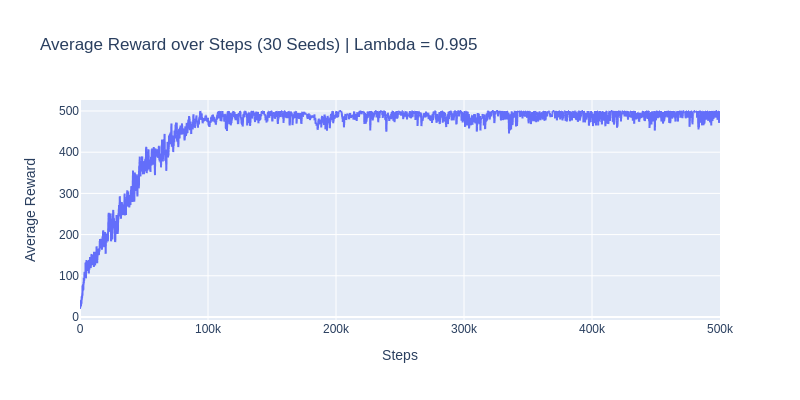

In [12]:
labas = 0.995
interpolated_sum = np.zeros(500_000+1)

for i in range(30):

    # Path to your CSV file
    csv_path = f"/home/pedro-mapa/Documents/UofA/Fall 2025 Courses/CMPUT 655/role_of_lambda/runs/lambda_{labas}/run_lambda_{labas}_seed_{i}.csv"

    # Read CSV
    df = pd.read_csv(csv_path)


    # Replace these with the correct column names from df
    x_col = df.columns[1]
    y_col = df.columns[0]

    # fig.add_trace(go.Scatter(x=df[x_col], y=df[y_col], mode='lines', name=f'Seed {i}'))
    interpolated_values = np.interp(np.linspace(0, 500_000, 500_000+1), df[x_col], df[y_col])
    interpolated_sum += interpolated_values

fig = go.Figure()
fig = px.line(x=np.linspace(0, 500_000, 500_000+1), y=interpolated_sum/30, labels={'x': 'Steps', 'y': 'Average Reward'}, title=f'Average Reward over Steps (30 Seeds) | Lambda = {labas}')
fig.update_layout(width=800, height=400)
fig.show(renderer='png')

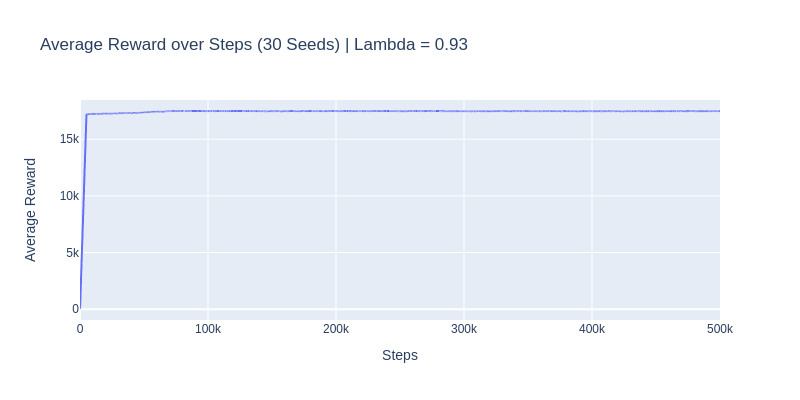

In [107]:
labas = 0.93
interpolated_sum = np.zeros(500_000+1)

for i in range(30):

    # Path to your CSV file
    csv_path = f"/home/pedro-mapa/Documents/UofA/Fall 2025 Courses/CMPUT 655/role_of_lambda/runs/lambda_{labas}/run_lambda_{labas}_seed_{i}.csv"

    # Read CSV
    df = pd.read_csv(csv_path)


    # Replace these with the correct column names from df
    x_col = df.columns[1]
    y_col = df.columns[0]

    # fig.add_trace(go.Scatter(x=df[x_col], y=df[y_col], mode='lines', name=f'Seed {i}'))
    interpolated_values = np.interp(np.linspace(0, 500_000, 500_000+1), df[x_col], df[y_col])
    interpolated_sum += interpolated_values

fig = go.Figure()
fig = px.line(x=np.linspace(0, 500_000, 500_000+1), y=interpolated_sum/30, labels={'x': 'Steps', 'y': 'Average Reward'}, title=f'Average Reward over Steps (30 Seeds) | Lambda = {labas}')
fig.update_layout(width=800, height=400)
fig.show(renderer='png')

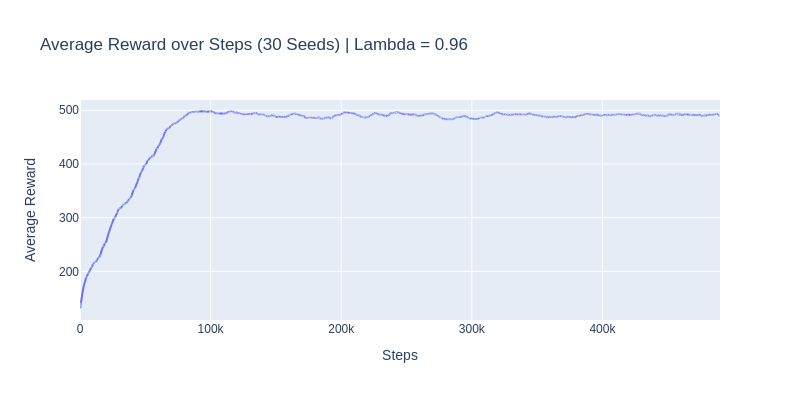

In [19]:
sum_avg = interpolated_sum/30
# Running average (window size = 100)
window_size = 10000
running_avg = np.convolve(sum_avg, np.ones(window_size) / window_size, mode='valid')

fig = go.Figure()
fig = px.line(x=np.arange(len(running_avg)), y=running_avg, labels={'x': 'Steps', 'y': 'Average Reward'}, title=f'Average Reward over Steps (30 Seeds) | Lambda = {labas}')
fig.update_layout(width=800, height=400)
fig.show(renderer='png')

In [191]:
import re
from pathlib import Path

# Folder with the runs
runs_folder = 'runs/'

# Get folder for each lambda
runs_folder = Path(runs_folder)
subfolders = [item for item in runs_folder.iterdir() if item.is_dir()]
lambda_folders = sorted([item.name for item in runs_folder.iterdir() if item.is_dir()])
lambdas = [re.findall(r'\d*\.?\d+', lambda_folder)[-1] for lambda_folder in lambda_folders]

# Load the csv for each lambda and each seed as a Pandas array
return_per_timestep_for_each_lambda = pd.DataFrame(columns=lambdas)
for lambda_folder in lambda_folders:
    print(f'Reading folder: {runs_folder/lambda_folder}')
    
    # Get lambda value
    labas = re.findall(r'\d*\.?\d+', lambda_folder)[-1]

    # Getting all the csv files in folder
    same_lambda_different_seeds_csvs = [e for e in (runs_folder/lambda_folder).iterdir() if str(e).endswith('.csv')]
    number_of_seeds = len(same_lambda_different_seeds_csvs)

    # Interpolate and average different seeds
    averaged_interpolated_returns = np.zeros(500_000+1)
    for csv_path in same_lambda_different_seeds_csvs:
        # Reading CSV
        dataframe = pd.read_csv(csv_path)
        if 'charts/episodic_return'in list(dataframe.columns):
            dataframe.rename(columns={'charts/episodic_return':'episodic_return'}, inplace=True)

        dataframe = dataframe[['episodic_return','global_step']]
        dataframe = dataframe.dropna()
        # Interpolation
        x_col = 'global_step'    
        y_col = 'episodic_return'

        interpolated_values = np.interp(np.linspace(0, 500_000-1, 500_000+1), dataframe[x_col], dataframe[y_col])

        # Averaging
        averaged_interpolated_returns += interpolated_values/number_of_seeds
        if np.isnan(interpolated_values.mean()):
            print(csv_path)
    # Saving 
    return_per_timestep_for_each_lambda[labas] = averaged_interpolated_returns

Reading folder: runs/lambda_0
Reading folder: runs/lambda_0.1
Reading folder: runs/lambda_0.2
Reading folder: runs/lambda_0.3
Reading folder: runs/lambda_0.4
Reading folder: runs/lambda_0.5
Reading folder: runs/lambda_0.6
Reading folder: runs/lambda_0.7
Reading folder: runs/lambda_0.8
Reading folder: runs/lambda_0.9
Reading folder: runs/lambda_0.905
Reading folder: runs/lambda_0.91
Reading folder: runs/lambda_0.915
Reading folder: runs/lambda_0.92
Reading folder: runs/lambda_0.925
Reading folder: runs/lambda_0.93
Reading folder: runs/lambda_0.935
Reading folder: runs/lambda_0.94
Reading folder: runs/lambda_0.945
Reading folder: runs/lambda_0.95
Reading folder: runs/lambda_0.955
Reading folder: runs/lambda_0.96
Reading folder: runs/lambda_0.965
Reading folder: runs/lambda_0.97
Reading folder: runs/lambda_0.975
Reading folder: runs/lambda_0.98
Reading folder: runs/lambda_0.985
Reading folder: runs/lambda_0.99
Reading folder: runs/lambda_0.995
Reading folder: runs/lambda_1


In [192]:
import matplotlib.pyplot as plt

y = return_per_timestep_for_each_lambda.sum(axis=0)
x = np.array(return_per_timestep_for_each_lambda.columns, dtype=np.float32)
fig = px.line(x=x, y=y)
fig.update_layout(title='Area under curve (AUC)', xaxis_title='Lambda', yaxis_title='Area Under Curve (AUC)')
fig.show()